In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,3)})
pd.set_option('display.max_columns', 50)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing_train = pd.read_csv('Housing_dataset_train.csv')
housing_test =  pd.read_csv('Housing_dataset_test.csv')
housing_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [3]:
housing_test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [4]:
print(f"The train dataset contains {housing_train.shape[0]} rows and {housing_train.shape[1]} columns")
print(f"The test dataset contains {housing_test.shape[0]} rows and {housing_test.shape[1]} columns")

The train dataset contains 14000 rows and 7 columns
The test dataset contains 6000 rows and 6 columns


In [5]:
print(housing_train.info())
print('------------' *5)
print(housing_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4

In [6]:
housing_train.describe(include='all')

,ID,loc,title,bedroom,bathroom,parking_space,price
count,14000.000000,12187,12278,12201.000000,12195.000000,12189.000000,1.400000e+04
unique,NaN,36,10,NaN,NaN,NaN,NaN
top,NaN,Kaduna,Flat,NaN,NaN,NaN,NaN
freq,NaN,370,1372,NaN,NaN,NaN,NaN
mean,4862.700357,NaN,NaN,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,NaN,NaN,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,NaN,NaN,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,NaN,NaN,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,NaN,NaN,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,NaN,NaN,6.000000,5.000000,4.000000,2.586699e+06


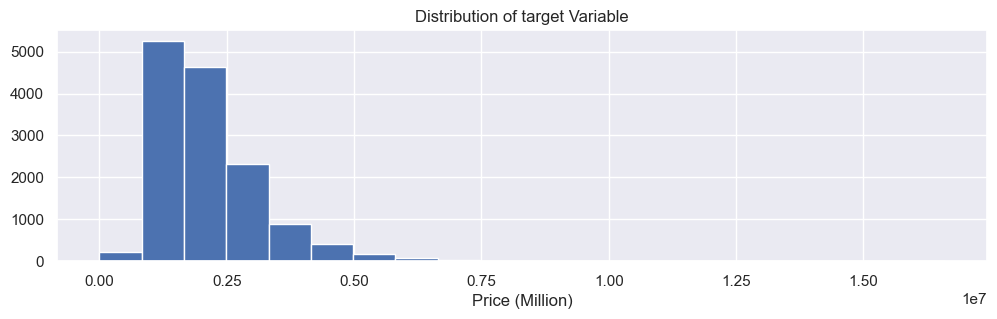

In [57]:
bins = np.arange(20, housing_train['price'].max()+830000, 830000)
plt.hist(data = housing_train, x = 'price', bins = bins)
plt.xlabel('Price (Million)')
plt.title('Distribution of target Variable');

In [8]:
housing_train.duplicated().sum()

0

In [9]:
housing_train.nunique()

ID               10182
loc                 36
title               10
bedroom              9
bathroom             7
parking_space        6
price            10727
dtype: int64

In [10]:
# Checking for misiing values
round((housing_train.isnull().sum().sort_values(ascending=False)/len(housing_train))*100,2)

loc              12.95
parking_space    12.94
bathroom         12.89
bedroom          12.85
title            12.30
ID                0.00
price             0.00
dtype: float64

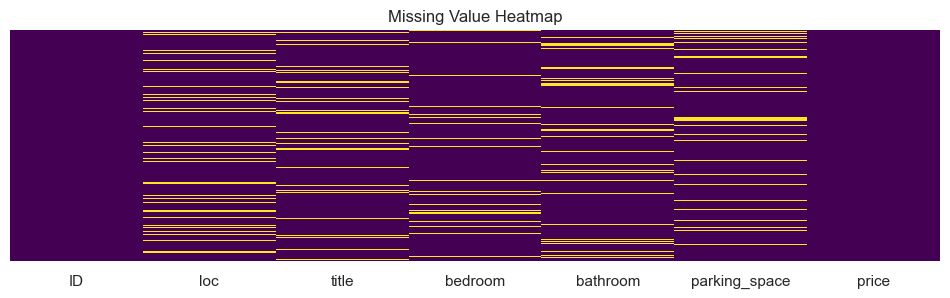

In [11]:
sns.heatmap(housing_train.isnull(),cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap");

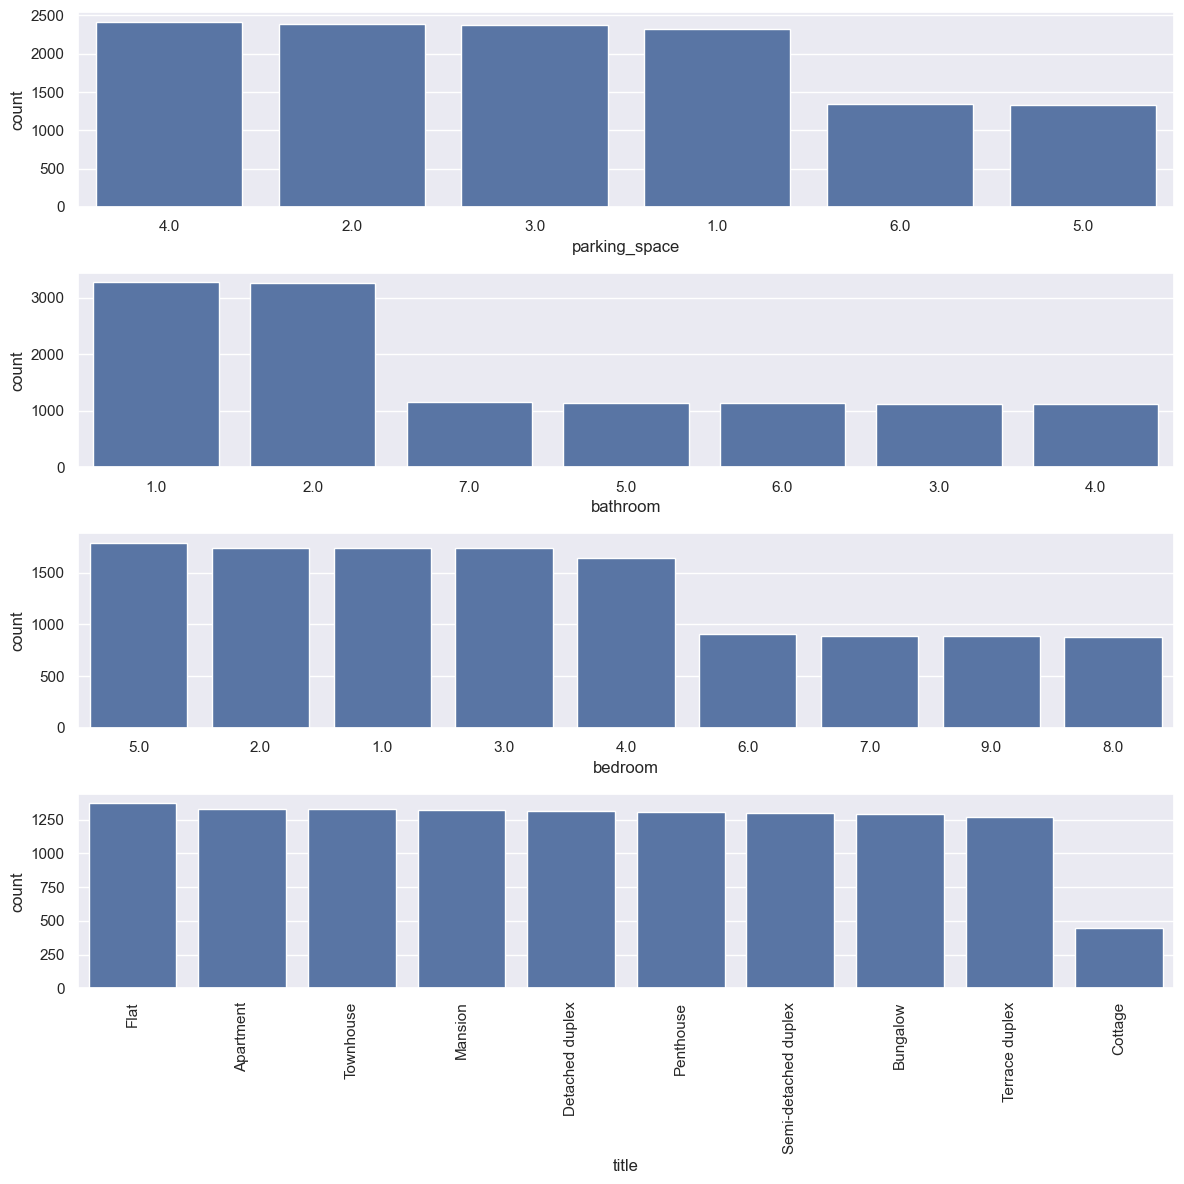

In [12]:
# Visualizing categorical variable and viewing it distribution
fig, ax = plt.subplots(nrows=4, figsize = [12,12])

sns.countplot(housing_train, x='parking_space', order = housing_train['parking_space'].value_counts().index, color=sns.color_palette()[0],ax=ax[0])
sns.countplot(housing_train, x='bathroom', order = housing_train['bathroom'].value_counts().index, color=sns.color_palette()[0], ax=ax[1])
sns.countplot(housing_train, x='bedroom', order = housing_train['bedroom'].value_counts().index, color=sns.color_palette()[0], ax=ax[2])
sns.countplot(housing_train, x='title', order = housing_train['title'].value_counts().index, color=sns.color_palette()[0], ax=ax[3])
plt.xticks(rotation=90)
plt.tight_layout();

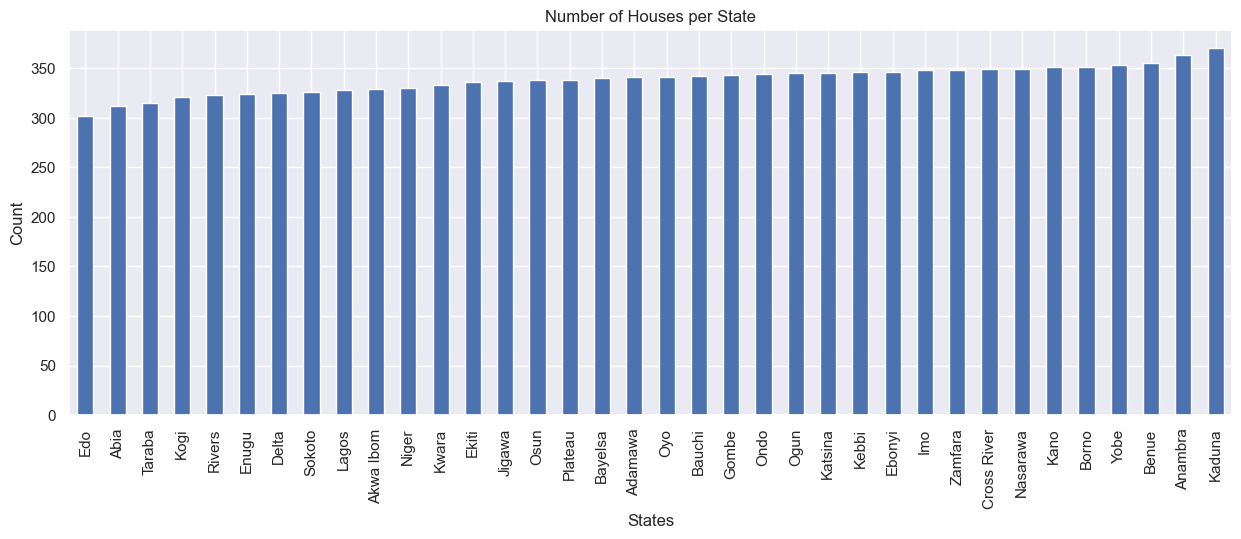

In [13]:
fig, ax = plt.subplots(figsize = [15,5])
housing_train['loc'].value_counts().sort_values().plot(kind='bar', color=sns.color_palette()[0], title='Number of Houses per State',
                    xlabel='States', ylabel='Count', ax=ax);

In [14]:
# Filling missing values
housing_train['loc'].fillna(method='ffill', inplace=True)
housing_train['title'].fillna(method='ffill', inplace=True)
housing_train['bedroom'].fillna(2.4, inplace=True) # with standard deviation
housing_train['bathroom'].fillna(2.0, inplace=True) # with standard deviation
housing_train['parking_space'].fillna(0, inplace=True)

#### Bivariate Analysis

In [15]:
housing_train.groupby('loc').agg({'price': ['mean', 'min', 'max']}).transpose()

loc                 Abia       Adamawa     Akwa Ibom       Anambra  \
price mean  1.811809e+06  1.975461e+06  2.632620e+06  2.323921e+06   
      min   6.061964e+05  6.835500e+05  6.570805e+05  7.637884e+05   
      max   1.404257e+07  5.411097e+06  7.051955e+06  6.083704e+06   

loc               Bauchi       Bayelsa         Benue         Borno  \
price mean  1.805657e+06  3.004365e+06  1.913200e+06  1.775811e+06   
      min   6.835680e+05  8.171727e+05  6.177318e+05  6.276460e+05   
      max   5.826113e+06  1.550231e+07  4.980433e+06  5.541453e+06   

loc          Cross River         Delta        Ebonyi           Edo  \
price mean  2.486532e+06  2.641994e+06  1.657793e+06  2.305664e+06   
      min   9.297631e+05  6.461897e+05  6.607267e+05  7.406691e+05   
      max   6.503235e+06  7.285383e+06  4.303727e+06  5.779194e+06   

loc                Ekiti         Enugu         Gombe           Imo  \
price mean  2.096943e+06  2.288718e+06  1.890633e+06  2.048470e+06   
      min   8.284753e+05  7.504373e+05  4.319673e+05  8.387869e+05   
      max   5.669571e+06  5.991266e+06  8.086733e+06  5.368037e+06   

loc               Jigawa        Kaduna          Kano       Katsina  \
price mean  1.802492e+06  1.916255e+06  2.090935e+06  1.975818e+06   
      min   6.028438e+05  6.459326e+05  7.500333e+05  7.381155e+05   
      max   6.731988e+06  6.739266e+06  5.788692e+06  5.066226e+06   

loc                Kebbi          Kogi         Kwara         Lagos  \
price mean  1.675376e+06  1.832482e+06  1.904282e+06  3.953472e+06   
      min   5.376227e+05  6.132461e+05  8.079815e+05  7.423385e+05   
      max   5.252522e+06  5.065658e+06  5.066226e+06  1.656849e+07   

loc             Nasarawa         Niger          Ogun          Ondo  \
price mean  2.087151e+06  1.935907e+06  2.536461e+06  2.253696e+06   
      min   8.392964e+05  7.473187e+05  9.633033e+05  8.003823e+05   
      max   5.893831e+06  7.080881e+06  7.300142e+06  5.928897e+06   

loc                 Osun           Oyo       Plateau        Rivers  \
price mean  2.154954e+06  2.294582e+06  2.009051e+06  2.856797e+06   
      min   8.116214e+05  8.888125e+05  7.249593e+05  8.515536e+05   
      max   5.368037e+06  6.053077e+06  5.060817e+06  7.647341e+06   

loc               Sokoto        Taraba          Yobe       Zamfara  
price mean  1.749805e+06  1.921674e+06  1.797058e+06  1.731326e+06  
      min   6.520056e+05  7.557151e+05  5.910321e+05  6.812829e+05  
      max   5.478795e+06  6.384284e+06  5.650468e+06  4.487928e+06

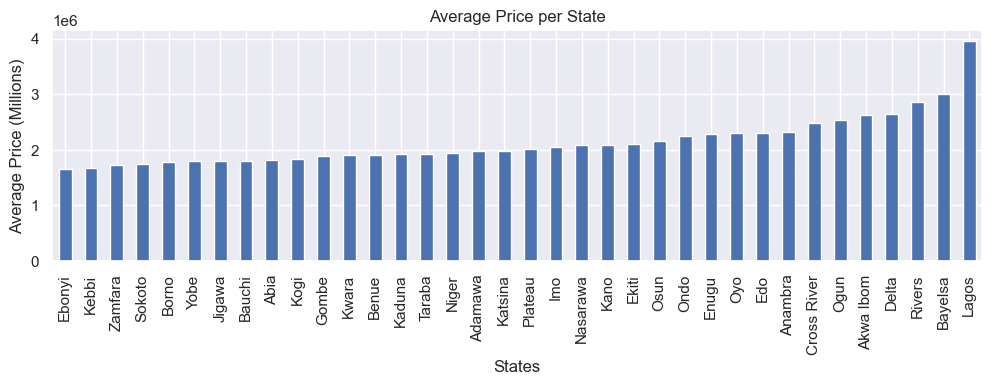

In [16]:
housing_train.groupby('loc')['price'].mean().sort_values().plot(
    kind="bar", title='Average Price per State',
                    ylabel='Average Price (Millions)', xlabel='States');

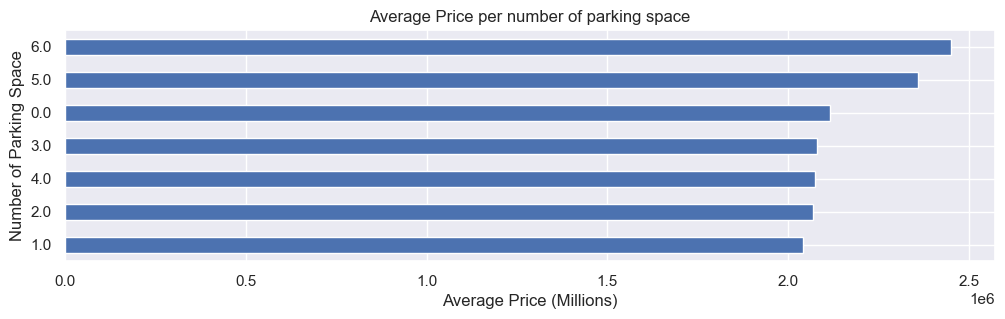

In [17]:
housing_train.groupby('parking_space')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per number of parking space',
                    xlabel='Average Price (Millions)', ylabel='Number of Parking Space');

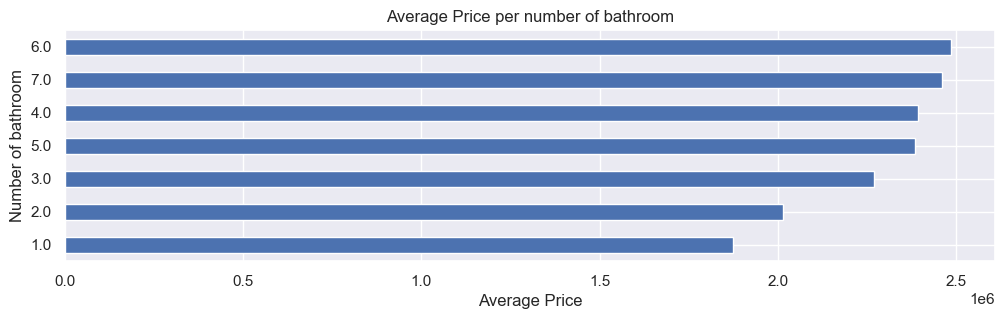

In [18]:
housing_train.groupby('bathroom')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per number of bathroom',
                    xlabel='Average Price', ylabel='Number of bathroom');

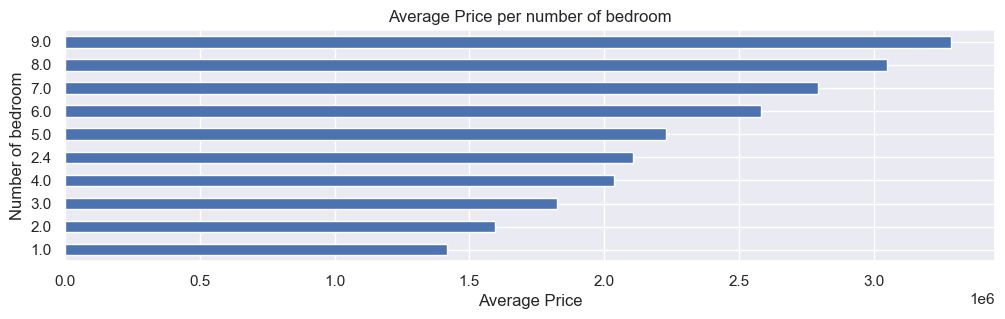

In [19]:
housing_train.groupby('bedroom')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per number of bedroom',
                    xlabel='Average Price', ylabel='Number of bedroom');

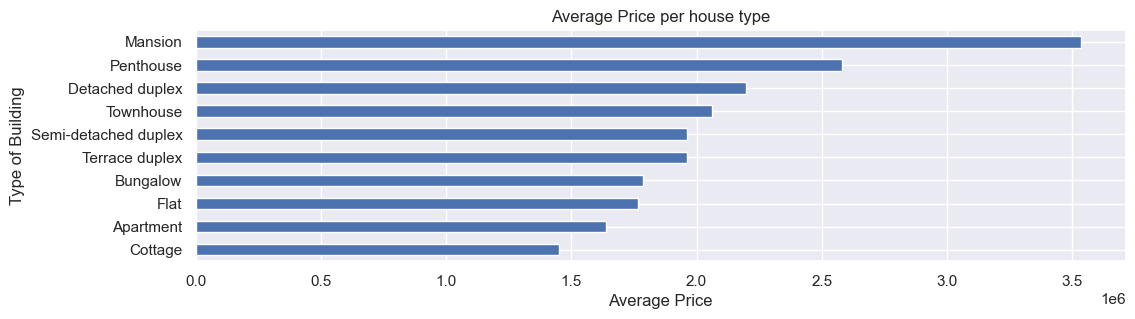

In [20]:
housing_train.groupby('title')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per house type',
                    xlabel='Average Price', ylabel='Type of Building');

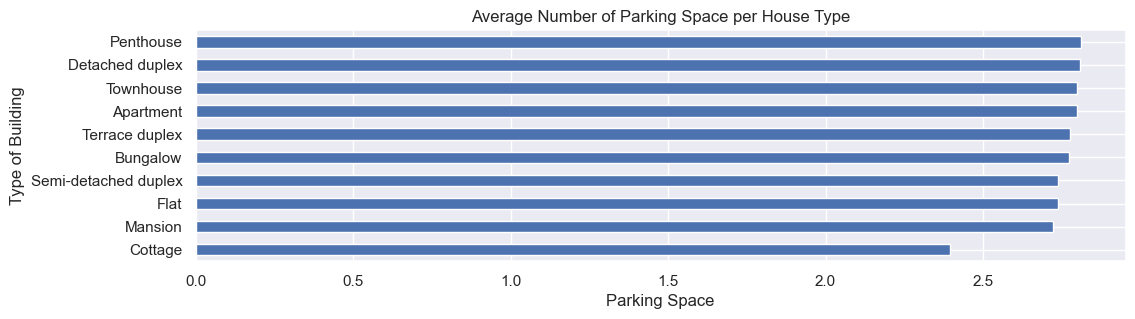

In [21]:
housing_train.groupby('title')['parking_space'].mean().sort_values().plot(
    kind="barh", title='Average Number of Parking Space per House Type',
                    xlabel='Parking Space', ylabel='Type of Building');

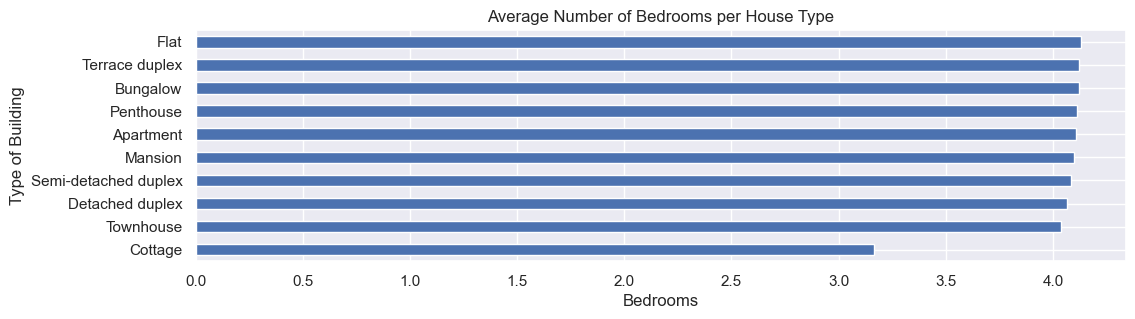

In [22]:
housing_train.groupby('title')['bedroom'].mean().sort_values().plot(
    kind="barh", title='Average Number of Bedrooms per House Type',
                    xlabel='Bedrooms', ylabel='Type of Building');

In [23]:
# housing_test.groupby('title')['bedroom'].mean().sort_values().plot(
#     kind="barh", title='Average Number of Bedrooms per House Type',
#                     xlabel='Bedrooms', ylabel='Type of Building');

#### Multivariate Analysis

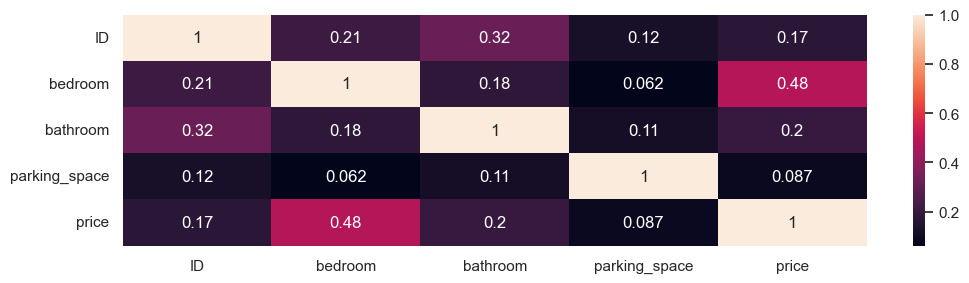

In [24]:
# Create correlation matrix
correlation = housing_train.select_dtypes("number").corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation, annot=True);

#### Feature Engineering

In [25]:
from sklearn.preprocessing import LabelEncoder

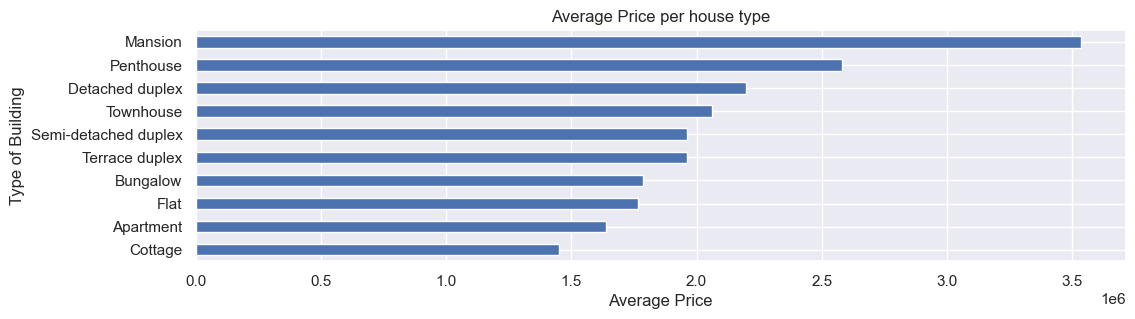

In [26]:
housing_train.groupby('title')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per house type',
                    xlabel='Average Price', ylabel='Type of Building');

In [27]:
# Define the ranking based on average price (arranged from smallest to biggest)
house_type_ranks = {'Cottage': 1, 'Apartment': 2, 'Flat': 3, 'Bungalow': 4,
    'Semi-detached duplex': 5, 'Terrace duplex': 6, 'Townhouse': 7,
    'Detached duplex': 8, 'Penthouse': 9, 'Mansion': 10
}

# Map the house types to numerical values based on size ranking
housing_train['title'] = housing_train['title'].map(house_type_ranks)
housing_test['title'] = housing_test['title'].map(house_type_ranks)


housing_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,5,2.0,2.0,1.0,1149999.565
1,2748,Ondo,2,2.4,2.0,4.0,1672416.689
2,9261,Ekiti,2,7.0,5.0,0.0,3364799.814
3,2224,Anambra,8,5.0,2.0,4.0,2410306.756
4,10300,Kogi,6,2.4,5.0,6.0,2600700.898


In [28]:
# Map state to their Geopolitical zones
state_to_zone = {
    'Abia': 'South East', 'Adamawa': 'North East', 'Akwa Ibom': 'South South', 'Anambra': 'South East', 'Bauchi': 'North East',
    'Bayelsa': 'South South', 'Benue': 'North Central', 'Borno': 'North East', 'Cross River': 'South South', 'Delta': 'South South','Ebonyi': 'South East',
    'Edo': 'South South', 'Ekiti': 'South West', 'Enugu': 'South East', 'Gombe': 'North East', 'Imo': 'South East',
    'Jigawa': 'North West', 'Kaduna': 'North West', 'Kano': 'North West', 'Katsina': 'North West', 'Kebbi': 'North West',
    'Kogi': 'North Central', 'Kwara': 'North Central', 'Lagos': 'South West', 'Nassarawa': 'North Central', 'Niger': 'North Central',
    'Ogun': 'South West', 'Ondo': 'South West','Osun': 'South West', 'Oyo': 'South West', 'Plateau': 'North Central',
    'Rivers': 'South South', 'Sokoto': 'North West','Taraba': 'North East', 'Yobe': 'North East','Zamfara': 'North West'
}

# Map the states to their geopolitical zones based on size ranking
housing_train['geopolitical_zone'] = housing_train['loc'].map(state_to_zone)
housing_test['geopolitical_zone'] = housing_test['loc'].map(state_to_zone)

housing_train['geopolitical_zone'].value_counts()

North West       2793
North East       2315
South West       2313
South South      2255
South East       1967
North Central    1958
Name: geopolitical_zone, dtype: int64

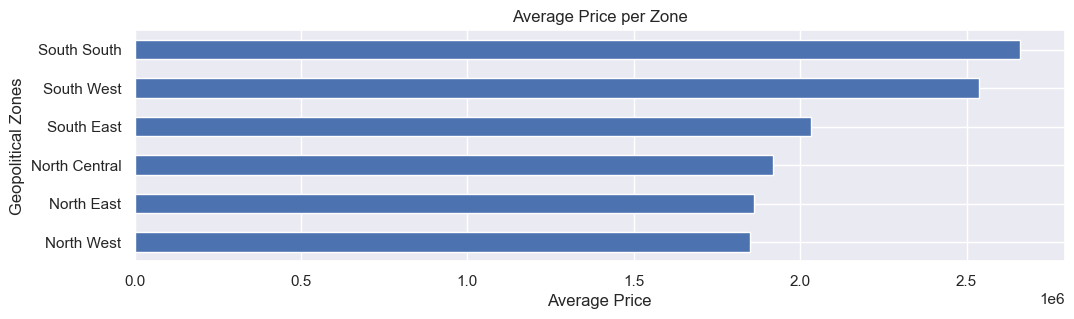

In [29]:
housing_train.groupby('geopolitical_zone')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per Zone',
                    xlabel='Average Price', ylabel='Geopolitical Zones');

In [30]:
# Define the ranking based on average price (arranged from smallest to biggest)
zone_ranks = {'North West': 1, 'North East': 2, 'North Central': 3, 'South East': 4,
    'South West': 5, 'South South': 6 }

# Map the house types to numerical values based on size ranking
housing_train['geopolitical_zone'] = housing_train['geopolitical_zone'].map(zone_ranks)
housing_test['geopolitical_zone'] = housing_test['geopolitical_zone'].map(zone_ranks)


housing_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,geopolitical_zone
0,3583,Katsina,5,2.0,2.0,1.0,1149999.565,1.0
1,2748,Ondo,2,2.4,2.0,4.0,1672416.689,5.0
2,9261,Ekiti,2,7.0,5.0,0.0,3364799.814,5.0
3,2224,Anambra,8,5.0,2.0,4.0,2410306.756,4.0
4,10300,Kogi,6,2.4,5.0,6.0,2600700.898,3.0


In [31]:
# perform one-hot encoding for the 'loc' and 'geopolitical' column
loc_encoded_train = pd.get_dummies(housing_train['loc'], prefix='loc')
loc_encoded_test = pd.get_dummies(housing_test['loc'], prefix='loc')

# concatenate the one-hot encoded columns with the original DataFrame
housing_train = pd.concat([housing_train, loc_encoded_train], axis=1)
housing_test = pd.concat([housing_test, loc_encoded_test], axis=1)

# Drop the original 'ID' and 'loc' columns
housing_train.drop(columns=['loc', 'ID'], inplace=True)
housing_test.drop(columns=['loc', 'ID'], inplace=True)

print(housing_train.shape, housing_test.shape)

(14000, 42) (6000, 41)


In [32]:
# Create new column - bedroom:bathroom ratio
housing_train['bed_bath_ratio'] = housing_train['bedroom']/housing_train['bathroom']
housing_test['bed_bath_ratio'] = housing_test['bedroom']/housing_test['bathroom']

In [33]:
housing_train.head()

,title,bedroom,bathroom,parking_space,price,geopolitical_zone,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,loc_Borno,loc_Cross River,loc_Delta,loc_Ebonyi,loc_Edo,loc_Ekiti,loc_Enugu,loc_Gombe,loc_Imo,loc_Jigawa,loc_Kaduna,loc_Kano,loc_Katsina,loc_Kebbi,loc_Kogi,loc_Kwara,loc_Lagos,loc_Nasarawa,loc_Niger,loc_Ogun,loc_Ondo,loc_Osun,loc_Oyo,loc_Plateau,loc_Rivers,loc_Sokoto,loc_Taraba,loc_Yobe,loc_Zamfara,bed_bath_ratio
0,5,2.0,2.0,1.0,1149999.565,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00
1,2,2.4,2.0,4.0,1672416.689,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.20
2,2,7.0,5.0,0.0,3364799.814,5.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40
3,8,5.0,2.0,4.0,2410306.756,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.50
4,6,2.4,5.0,6.0,2600700.898,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.48


In [34]:
housing_test.head()

,title,bedroom,bathroom,parking_space,geopolitical_zone,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,loc_Borno,loc_Cross River,loc_Delta,loc_Ebonyi,loc_Edo,loc_Ekiti,loc_Enugu,loc_Gombe,loc_Imo,loc_Jigawa,loc_Kaduna,loc_Kano,loc_Katsina,loc_Kebbi,loc_Kogi,loc_Kwara,loc_Lagos,loc_Nasarawa,loc_Niger,loc_Ogun,loc_Ondo,loc_Osun,loc_Oyo,loc_Plateau,loc_Rivers,loc_Sokoto,loc_Taraba,loc_Yobe,loc_Zamfara,bed_bath_ratio
0,9,4,1,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
1,2,2,2,4,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000
2,4,2,7,2,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.285714
3,10,9,5,2,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.800000
4,5,5,6,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.833333


#### Training

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

In [36]:
# Splitting features and Target
X = housing_train.drop(columns=['price']) 
y = housing_train['price']

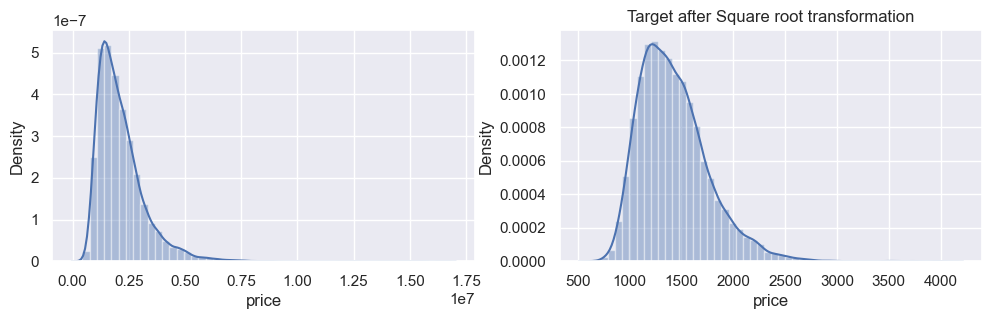

In [37]:
# Apply Sqrt transformation to the target variable
y_transformed = pd.Series(np.sqrt(y))
fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Square root transformation")
sns.distplot(y_transformed, ax=ax[1]);

In [38]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y_transformed, test_size = 0.2, random_state = 0)

### Baseline Model (Light GBM)

In [39]:
# Train the model on the transformed target variable
light = LGBMRegressor(random_state=42)
light.fit(X_train, y_train)
# Make predictions on the validation set
light_pred = light.predict(X_val)

In [40]:
# Inverse transform the validation and predictions to get back the original scale
y_val = y_val**2
y_pred = light_pred**2

In [41]:
comparison = pd.DataFrame({'Actual Values':y_val, 'Predictions':y_pred})
comparison.head(10)

,Actual Values,Predictions
6038,3.405235e+06,2.883365e+06
10758,8.276166e+05,8.658155e+05
13882,1.616218e+06,1.366034e+06
2760,1.370738e+06,1.474160e+06
10778,2.717766e+06,1.887036e+06
4707,3.048011e+06,2.879653e+06
13976,1.264297e+06,1.433825e+06
9169,5.068284e+06,2.525942e+06
467,1.859993e+06,1.978421e+06
499,7.194962e+05,1.496849e+06


In [42]:
print(f'mse = {mean_squared_error(y_val, y_pred, squared=False)}')

mse = 610963.6576248581


#### Prediction on test dataset

In [43]:
submission = pd.read_csv('Sample_submission.csv')

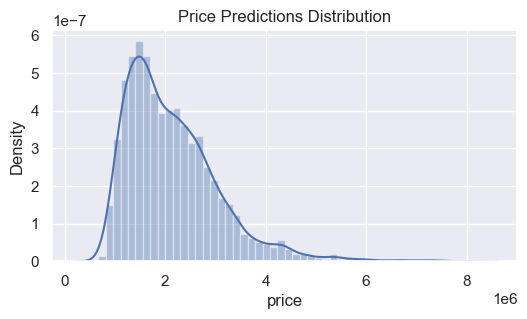

In [44]:
# Make prediction on the test set
predictions = light.predict(housing_test)
# Inverse transform the predictions to get back the original scale
predictions = predictions**2

# Create a submission file
sub_file = submission.copy()
sub_file['price'] = predictions

# Check the distribution of  predictions
plt.figure(figsize=(6, 3))
sns.distplot(sub_file.price)
plt.title('Price Predictions Distribution');

In [45]:
# Write to csv file to submit to Zindi
sub_file.to_csv("Baseline2.csv", index = False)

### Hyper parameter Tunning (LightGBM)

In [46]:
fold_pred=[]
oof_pred = []

params = {'num_leaves': 10, 
          'n_estimators': 500, 
          'max_depth': 7, 
          'learning_rate': 0.1, 
          'colsample_bytree': 0.5, 
          'subsample': 0.5}

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse", random_state=101)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose = False)#erly100

    pred= model.predict(X_test)
    print("rmse: ",(mean_squared_error(y_test,(pred)**2, squared=False)))
    oof_pred.append(mean_squared_error(y_test,(pred)**2,squared=False))
    p2 = model.predict(housing_test[X.columns])
    fold_pred.append(p2**2)
    

print(np.mean(oof_pred))

rmse:  557084.876602006
rmse:  741212.734470628
rmse:  471736.04074427584
rmse:  590323.3648906859
rmse:  544647.3815053022
rmse:  653079.2545752038
rmse:  556944.1070319433
rmse:  511717.06788004935
rmse:  557366.5615139137
rmse:  652655.8570926229
583676.7246306629


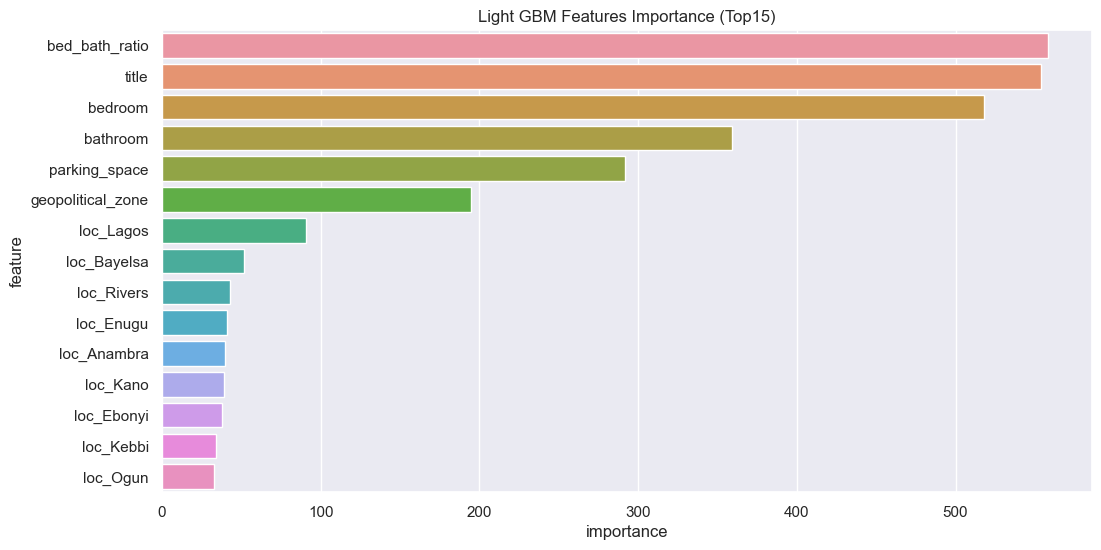

In [58]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(15))
plt.title('Light GBM Features Importance (Top15)');

In [48]:
sub_file['price'] =  np.mean(fold_pred, axis = 0)

In [49]:
sub_file.to_csv('lightGB2_submission.csv', index=False)

### CatBoost Regressor

In [50]:
fold_pred_2=[]
oof_pred_2 = []

fold_2 = KFold(n_splits=10, shuffle=True)

for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test =  np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    model_2 = CatBoostRegressor(subsample=0.9, iterations=700, learning_rate=0.1, l2_leaf_reg= 5, depth = 3, colsample_bylevel = 0.7, random_state = 101) 
    model_2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose = False)#erly100

    preds= model_2.predict(X_test)
    print("rmse: ",(mean_squared_error(y_test,(preds)**2, squared=False))) 
    oof_pred_2.append(mean_squared_error(y_test,(preds)**2,squared=False))
    p3 = model_2.predict(housing_test[X.columns])
    fold_pred_2.append((p3)**2)
    

print(np.mean(oof_pred_2))

rmse:  553568.6377635042
rmse:  740833.1396187928
rmse:  464859.2284835107
rmse:  583423.2874835273
rmse:  549333.1243694908
rmse:  647589.8314180303
rmse:  558039.714374638
rmse:  513551.42765037727
rmse:  560496.267792452
rmse:  654029.6519315593
582572.4310885883


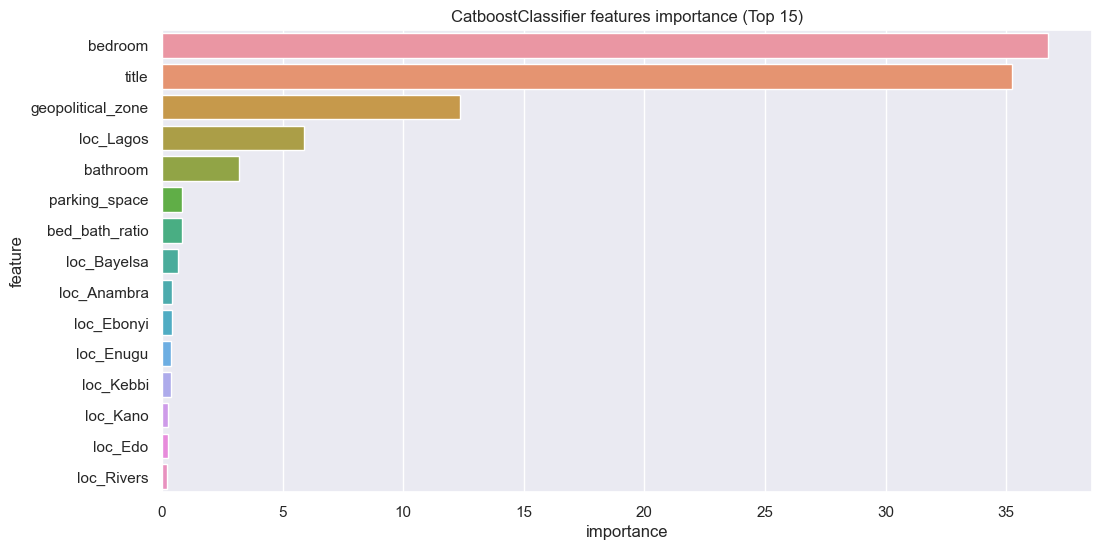

In [59]:
feature_importance_df = pd.DataFrame(model_2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(15))
plt.title('CatboostClassifier features importance (Top 15)');

In [52]:
sub_file['price'] =  np.mean(fold_pred_2, axis = 0)

In [53]:
sub_file.to_csv('CatBoost2_submission.csv', index=False)

Blending of Models

In [54]:
cat_pred = pd.read_csv('CatBoost2_submission.csv')['price']
lgb_pred = pd.read_csv('lightGB2_submission.csv')['price']

In [55]:
sub_pred = (cat_pred * 0.7) + (lgb_pred * 0.3)
sub_file['price'] = sub_pred
sub_file.to_csv('Blended.csv', index=False)